# View Results of LibTadTran in Thermal mode

- author : Sylvie Dagoret-Campagne
- afflilation : LAL/IJCLab, CNRS
- creation date : January 24th 2020
- update : 
 

In [1]:
import os
import re
import numpy as np

In [2]:
import locale
locale.setlocale(locale.LC_ALL, 'en_US.UTF-8') # vary depending on your lang/locale

'en_US.UTF-8'

In [3]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib.colors as colors
import matplotlib.cm as cmx

In [4]:
import numpy as np
import re
import time
from datetime import datetime,date
import dateutil.parser

In [5]:
from scipy import signal

In [6]:
matplotlib.rcParams.update({'font.size': 15, 'lines.linewidth': 2, 'lines.markersize': 15})
matplotlib.rcParams["axes.labelsize"]="small"
matplotlib.rcParams["axes.linewidth"]=2.0
matplotlib.rcParams["xtick.major.size"]=8
matplotlib.rcParams["ytick.major.size"]=8
matplotlib.rcParams["ytick.minor.size"]=5
matplotlib.rcParams["xtick.labelsize"]="large"
matplotlib.rcParams["ytick.labelsize"]="large"
matplotlib.rcParams["figure.figsize"]=(16,8)
matplotlib.rcParams['axes.titlesize'] = 15
matplotlib.rcParams['axes.titleweight'] = 'bold'
#matplotlib.rcParams['axes.facecolor'] = 'blue'
matplotlib.rcParams['xtick.direction'] = 'out'
matplotlib.rcParams['ytick.direction'] = 'out'
matplotlib.rcParams['lines.markeredgewidth'] = 0.3 # the line width around the marker symbol
matplotlib.rcParams['lines.markersize'] = 10  # markersize, in points
matplotlib.rcParams['grid.alpha'] = 1. # transparency, between 0.0 and 1.0
matplotlib.rcParams['grid.linestyle'] = '-' # simple line
matplotlib.rcParams['grid.linewidth'] = 0.4 # in points 

# Start

In [7]:
today = date.today()
string_date=today.strftime("%Y-%m-%d")

# UVSPEC_REPTRAN_THERMAL_NOCLOUDS

In [8]:
! cat UVSPEC_REPTRAN_THERMAL_NOCLOUDS.INP

rte_solver disort          # Radiative transfer equation solver

# Uncomment the following line to use finer spectral resolution
#mol_abs_param reptran fine 

atmosphere_file /Users/dagoret//MacOSX/External/libRadtran/libRadtran-2.0.1/data/atmmod/afglus.dat
data_files_path /Users/dagoret//MacOSX/External/libRadtran/libRadtran-2.0.1/data

                         

albedo 0                   # set albedo to 0, emissivity to 1
source thermal             # thermal
wavelength 2500 100000


zout  0                         # looking downward


output_quantity brightness
#output_process per_nm



output_user lambda edn


quiet


In [9]:
! head UVSPEC_REPTRAN_THERMAL_NOCLOUDS.OUT

 2504.705  2.838505e+02 
 2514.151  2.864182e+02 
 2523.668  2.866878e+02 
 2533.258  2.877068e+02 
 2542.921  2.877233e+02 
 2552.658  2.878301e+02 
 2562.469  2.880238e+02 
 2572.357  2.881179e+02 
 2582.321  2.881200e+02 
 2592.362  2.881575e+02 


In [10]:
file="UVSPEC_REPTRAN_THERMAL_NOCLOUDS.OUT"

In [11]:
arr=np.loadtxt(file)

In [12]:
arr.shape

(260, 2)

In [13]:
NBC=arr.shape[1]-1

In [14]:
# wavelength bin colors
jet = plt.get_cmap('jet')
cNorm = colors.Normalize(vmin=0, vmax=NBC)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
all_colors = scalarMap.to_rgba(np.arange(NBC), alpha=1)

In [15]:
wl=arr[:,0]
out=arr[:,1]

In [16]:
arr[0,:]

array([2504.705 ,  283.8505])

(0, 20000)

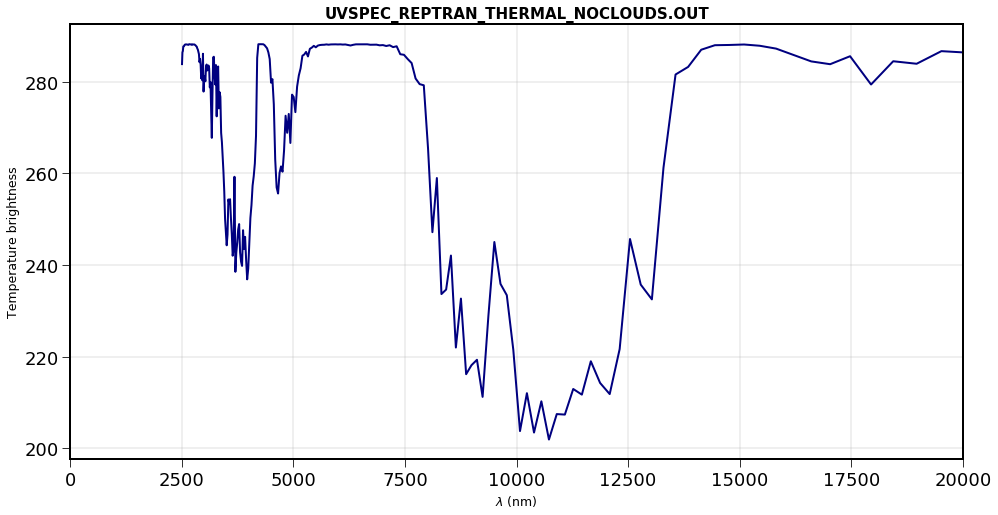

In [17]:
for ii in np.arange(NBC):
  
        plt.plot(wl,arr[:,ii+1],color=all_colors[ii])
plt.grid()
plt.title(file)
plt.xlabel("$\\lambda$ (nm)")
plt.ylabel("Temperature brightness")
plt.xlim(0,20000)

# UVSPEC_REPTRAN_THERMAL_FINE_NOCLOUDS

In [18]:
! cat UVSPEC_REPTRAN_THERMAL_FINE_NOCLOUDS.INP

rte_solver disort          # Radiative transfer equation solver

# Uncomment the following line to use finer spectral resolution
mol_abs_param reptran fine 

atmosphere_file /Users/dagoret//MacOSX/External/libRadtran/libRadtran-2.0.1/data/atmmod/afglus.dat
data_files_path /Users/dagoret//MacOSX/External/libRadtran/libRadtran-2.0.1/data

                         

albedo 0                   # set albedo to 0, emissivity to 1
source thermal             # thermal
wavelength 2500 100000


zout  0                         # looking downward


output_quantity brightness
#output_process per_nm



output_user lambda edn


quiet


In [19]:
! head UVSPEC_REPTRAN_THERMAL_FINE_NOCLOUDS.OUT

 2500.312  2.776758e+02 
 2500.938  2.809197e+02 
 2501.563  2.809439e+02 
 2502.189  2.827932e+02 
 2502.816  2.870208e+02 
 2503.442  2.869718e+02 
 2504.069  2.839823e+02 
 2504.696  2.862003e+02 
 2505.324  2.854210e+02 
 2505.952  2.878477e+02 


In [20]:
file="UVSPEC_REPTRAN_THERMAL_FINE_NOCLOUDS.OUT"

In [21]:
arr=np.loadtxt(file)

In [22]:
NBC=arr.shape[1]-1

In [23]:
# wavelength bin colors
jet = plt.get_cmap('jet')
cNorm = colors.Normalize(vmin=0, vmax=NBC)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
all_colors = scalarMap.to_rgba(np.arange(NBC), alpha=1)

In [24]:
wl=arr[:,0]
out=arr[:,1]

(0, 20000)

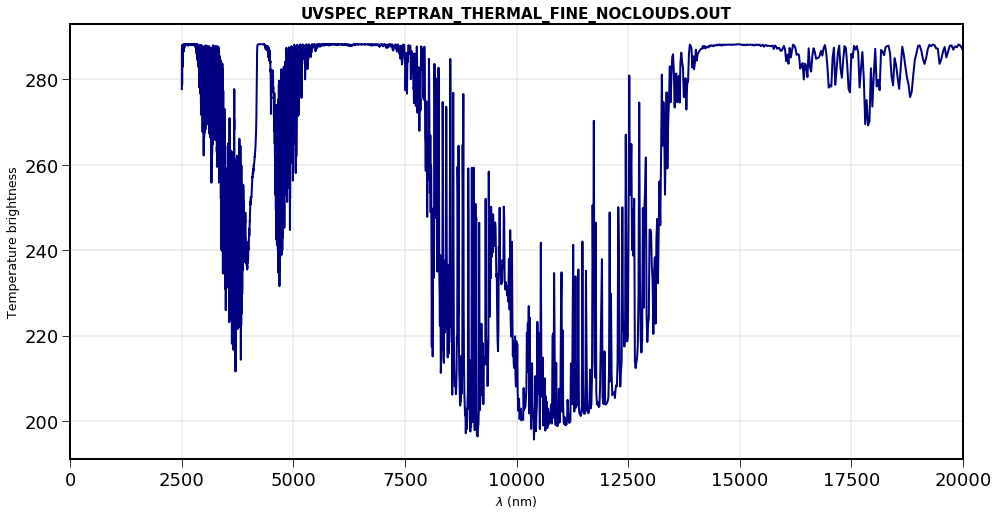

In [25]:
for ii in np.arange(NBC):
        plt.plot(wl,arr[:,ii+1],color=all_colors[ii])
plt.grid()
plt.title(file)
plt.xlabel("$\\lambda$ (nm)")
plt.ylabel("Temperature brightness")
plt.xlim(0,20000)

# UVSPEC_LOWTRAN_THERMAL_NOCLOUDS

In [26]:
! cat UVSPEC_LOWTRAN_THERMAL_NOCLOUDS.INP

# uvspec data files

data_files_path /Users/dagoret/MacOSX/External/libRadtran/libRadtran-2.0.1/data/
atmosphere_file /Users/dagoret/MacOSX/External/libRadtran/libRadtran-2.0.1/examples/AFGLUS.70KM
source thermal /Users/dagoret/MacOSX/External/libRadtran/libRadtran-2.0.1/examples/UVSPEC_LOWTRAN_THERMAL.TRANS

#atmosphere_file /Users/dagoret/MacOSX/External/libRadtran/libRadtran-2.0.1/data/atmmod/afglus.dat
#data_files_path /Users/dagoret/MacOSX/External/libRadtran/libRadtran-2.0.1/data

rte_solver twostr     # Radiative transfer equation solver
pseudospherical
wavelength_grid_file /Users/dagoret/MacOSX/External/libRadtran/libRadtran-2.0.1/examples/UVSPEC_LOWTRAN_THERMAL.TRANS

mol_abs_param LOWTRAN  # select LOWTRAN molecular absorption 

#output_process per_nm
output_quantity brightness
output_user lambda edn


quiet


In [27]:
! head UVSPEC_LOWTRAN_THERMAL_NOCLOUDS.OUT

 2999.000  2.799593e+02 
 3003.000  2.799341e+02 
 3008.000  2.809043e+02 
 3012.000  2.808993e+02 
 3017.000  2.817170e+02 
 3021.000  2.817402e+02 
 3026.000  2.821656e+02 
 3030.000  2.821981e+02 
 3035.000  2.833857e+02 
 3040.000  2.838232e+02 


In [28]:
file="UVSPEC_LOWTRAN_THERMAL_NOCLOUDS.OUT"

In [29]:
arr=np.loadtxt(file)

In [30]:
arr.shape

(648, 2)

In [31]:
NBC=arr.shape[1]-1

In [32]:
# wavelength bin colors
jet = plt.get_cmap('jet')
cNorm = colors.Normalize(vmin=0, vmax=NBC)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
all_colors = scalarMap.to_rgba(np.arange(NBC), alpha=1)

In [33]:
wl=arr[:,0]
out=arr[:,1]

(0, 20000)

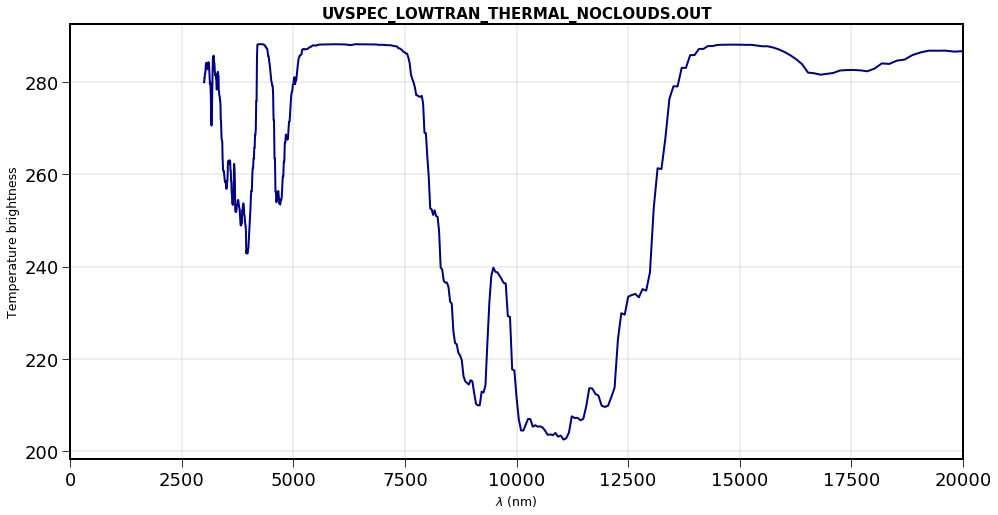

In [34]:
for ii in np.arange(NBC):
  
        plt.plot(wl,arr[:,ii+1],color=all_colors[ii])
plt.grid()
plt.title(file)
plt.xlabel("$\\lambda$ (nm)")
plt.ylabel("Temperature brightness")
plt.xlim(0,20000)

# UVSPEC_LOWTRAN_THERMAL_ICCLOUDS

In [35]:
file="UVSPEC_LOWTRAN_THERMAL_ICCLOUDS.OUT"

In [36]:
arr=np.loadtxt(file)

In [37]:
NBC=arr.shape[1]-1

In [38]:
# wavelength bin colors
jet = plt.get_cmap('jet')
cNorm = colors.Normalize(vmin=0, vmax=NBC)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
all_colors = scalarMap.to_rgba(np.arange(NBC), alpha=1)